## Importing and Data Loading

In [18]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wine_data = pd.read_csv('wine_data.csv')

# basic structure
print("Dataset Information:\n")
print(wine_data.info())



Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


## Most Frequent Wine Quality and Min/Max

Quality Score Frequency:
 quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64
Most Frequent Quality Score: 5 (Count: 681)
Minimum Quality Score: 3
Maximum Quality Score: 8


<ipython-input-19-559853517b58>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=wine_data, x='quality', palette='Set2')


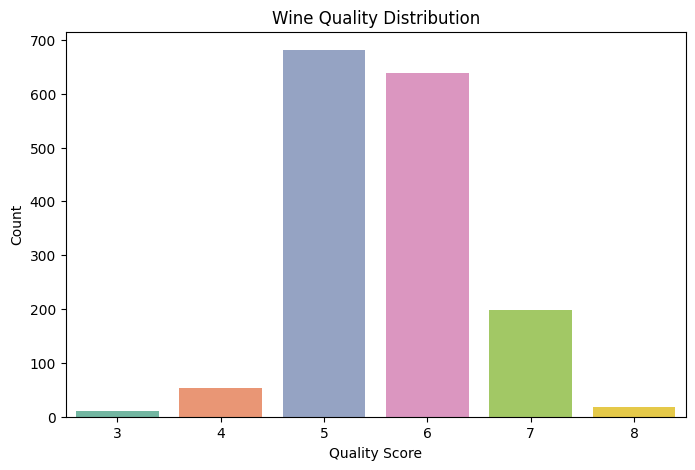

In [19]:

quality_counts = wine_data['quality'].value_counts()
most_frequent_quality = quality_counts.idxmax()
most_frequent_count = quality_counts.max()
min_quality = wine_data['quality'].min()
max_quality = wine_data['quality'].max()

print("Quality Score Frequency:\n", quality_counts)
print(f"Most Frequent Quality Score: {most_frequent_quality} (Count: {most_frequent_count})")
print(f"Minimum Quality Score: {min_quality}")
print(f"Maximum Quality Score: {max_quality}")

plt.figure(figsize=(8,5))
sns.countplot(data=wine_data, x='quality', palette='Set2')
plt.title("Wine Quality Distribution")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()


## correlation b/w Fixed Acidity vs Quality

Correlation between Fixed Acidity and Quality: 0.12405164911322428


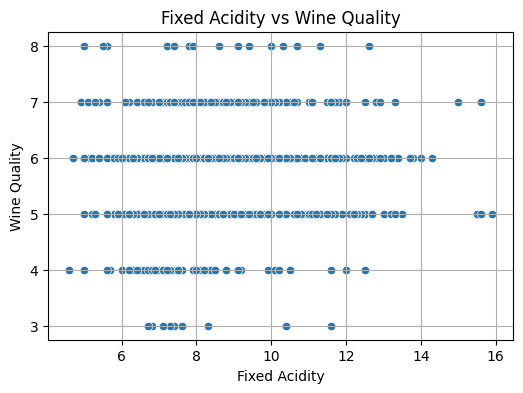

In [20]:

fixed_acidity_corr = wine_data['fixed acidity'].corr(wine_data['quality'])
print("Correlation between Fixed Acidity and Quality:", fixed_acidity_corr)

plt.figure(figsize=(6, 4))
sns.scatterplot(data=wine_data, x='fixed acidity', y='quality')
plt.title("Fixed Acidity vs Wine Quality")
plt.xlabel("Fixed Acidity")
plt.ylabel("Wine Quality")
plt.grid(True)
plt.show()


## correlation b/w Alcohol vs Quality

Correlation between Alcohol Content and Quality: 0.4761663239995365


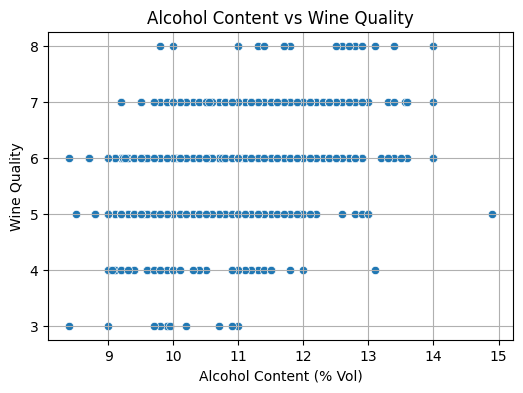

In [21]:

alcohol_corr = wine_data['alcohol'].corr(wine_data['quality'])
print("Correlation between Alcohol Content and Quality:", alcohol_corr)

plt.figure(figsize=(6, 4))
sns.scatterplot(data=wine_data, x='alcohol', y='quality')
plt.title("Alcohol Content vs Wine Quality")
plt.xlabel("Alcohol Content (% Vol)")
plt.ylabel("Wine Quality")
plt.grid(True)
plt.show()


## correlation b/w Free Sulfur Dioxide vs Quality

Correlation between Free Sulfur Dioxide and Quality: -0.0506560572442763


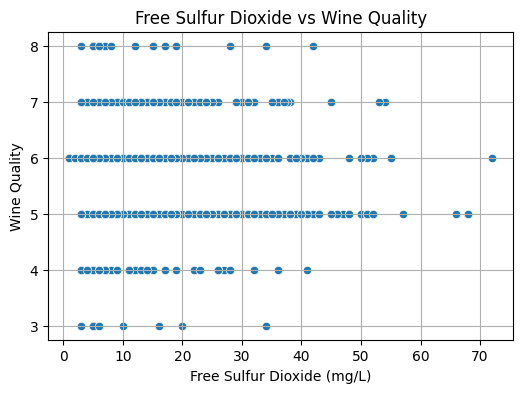

In [22]:

free_sulfur_corr = wine_data['free sulfur dioxide'].corr(wine_data['quality'])
print("Correlation between Free Sulfur Dioxide and Quality:", free_sulfur_corr)

plt.figure(figsize=(6, 4))
sns.scatterplot(data=wine_data, x='free sulfur dioxide', y='quality')
plt.title("Free Sulfur Dioxide vs Wine Quality")
plt.xlabel("Free Sulfur Dioxide (mg/L)")
plt.ylabel("Wine Quality")
plt.grid(True)
plt.show()


## average Residual Sugar for Best and Worst Quality Wines

In [23]:

best_quality = wine_data['quality'].max()
worst_quality = wine_data['quality'].min()

best_quality_wines = wine_data[wine_data['quality'] == best_quality]
worst_quality_wines = wine_data[wine_data['quality'] == worst_quality]

avg_residual_best = best_quality_wines['residual sugar'].mean()
avg_residual_worst = worst_quality_wines['residual sugar'].mean()

print("Average Residual Sugar for Best Quality Wine (Quality =", best_quality, "):", avg_residual_best)
print("Average Residual Sugar for Worst Quality Wine (Quality =", worst_quality, "):", avg_residual_worst)


Average Residual Sugar for Best Quality Wine (Quality = 8 ): 2.5777777777777775
Average Residual Sugar for Worst Quality Wine (Quality = 3 ): 2.6350000000000002


## correlation b/w Volatile Acidity vs Quality

Correlation between Volatile Acidity and Quality: -0.390557780264007


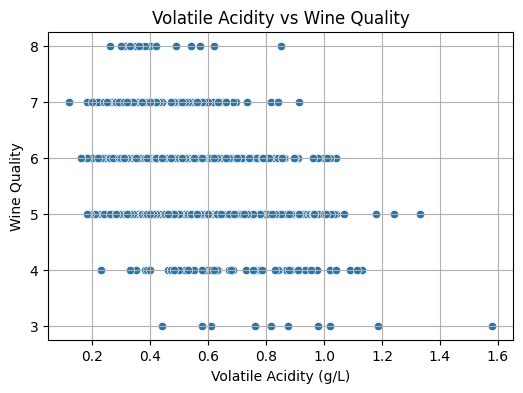

In [24]:

volatile_acidity_corr = wine_data['volatile acidity'].corr(wine_data['quality'])
print("Correlation between Volatile Acidity and Quality:", volatile_acidity_corr)

plt.figure(figsize=(6, 4))
sns.scatterplot(data=wine_data, x='volatile acidity', y='quality')
plt.title("Volatile Acidity vs Wine Quality")
plt.xlabel("Volatile Acidity (g/L)")
plt.ylabel("Wine Quality")
plt.grid(True)
plt.show()


##  ML Model Training - Decision Tree and Random Forest (accuracy comparison)

In [25]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt, zero_division=0))

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, zero_division=0))


Decision Tree Accuracy: 0.559375
Decision Tree Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.68      0.65       130
           6       0.55      0.53      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.28      0.28      0.28       320
weighted avg       0.55      0.56      0.55       320

Random Forest Accuracy: 0.659375
Random Forest Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.75      0.73       130
           6       0.63      0.69      0.66       132
           7       0.63      0.52      0.57 